In [77]:
# Daniele Genta
# Homework 1
# April 2020

import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score
import pylab as pl

In [78]:
# step1 - load the dataset and apply some preprocessing/data exploration
raw_data = load_wine(return_X_y=False)

In [79]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']

# data exploration
print(data.head())
print(data.describe())
print(data.isna())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

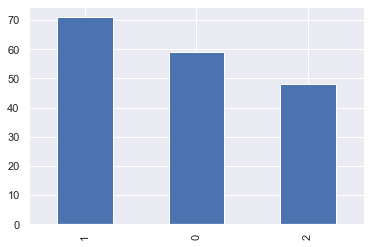

In [80]:
# (preprocessing) Is the dataset balanced?
features['target'].value_counts().plot(kind='bar')

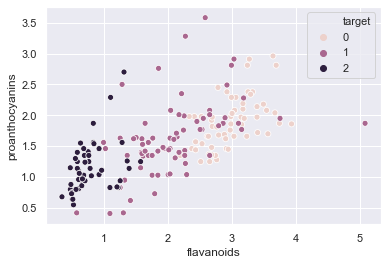

In [81]:
# step2 - 2d representation of the first two features
"""represented_data = data[['alcohol', 'malic_acid', 'target']]
ax = sns.scatterplot(x="alcohol", y="malic_acid", data=represented_data, hue = 'target')"""

#extra #2
represented_data = data[['flavanoids', 'proanthocyanins', 'target']]
ax = sns.scatterplot(x="flavanoids", y="proanthocyanins", data=represented_data, hue = 'target')

In [82]:
## !! apply all only on the 2 selected columns !!
data = represented_data

# step3 - Randomly split data into train, validation and test sets in proportion 5:2:3
X = data.loc[:, data.columns != 'target']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 20) # 0.25 x 0.8 = 0.2

In [83]:
from matplotlib.colors import ListedColormap

def plotBoundaries(model, X1, Y_train_graph, title):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', 'lightgreen', 'lightblue'])
    cmap_bold = ListedColormap(['red', 'green', 'blue'])

    X_train_graph = np.array(X1)
    h = 0.02
    
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X_train_graph[:,0].min() - .5, X_train_graph[:,0].max() + .5
    y_min, y_max = X_train_graph[:,1].min() - .5, X_train_graph[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    #pl.set_cmap(pl.cm.Paired)
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X_train_graph[:,0], X_train_graph[:,1], c = Y_train_graph, cmap=cmap_bold)
    """    pl.xlabel('alcohol')
    pl.ylabel('mical acid')"""
    
    # extra #2
    pl.xlabel('flavanoids')
    pl.ylabel('proanthocyanins')

    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    #pl.xticks(())
    #pl.yticks(())
    
    pl.title(title)

    pl.show()

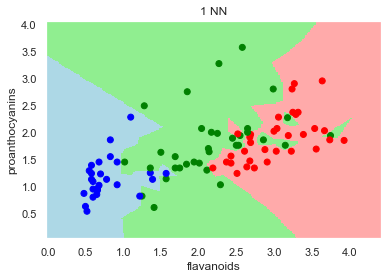

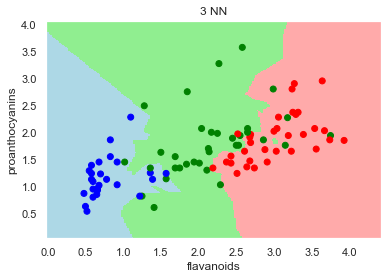

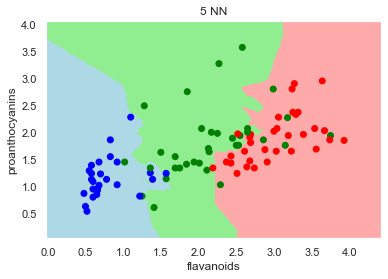

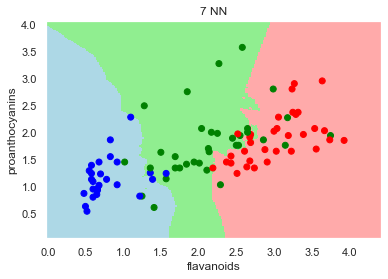

In [84]:
# step4 - apply KNN for K = [1,3, 5,7]
k_vect = [1, 3, 5, 7]

x_acc = []
y_acc = []

for k in k_vect:
    # a. Apply K-Nearest Neighbors
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_val)
    
    # b. Plot the data and the decision boundaries 
    title = str(k)+' NN'
    plotBoundaries(neigh, X_train, y_train, title)
    
    # c. Evaluate the method on the validation set
    local_acc= metrics.accuracy_score(y_val, y_pred)
    
    x_acc.append(k)
    y_acc.append(local_acc)

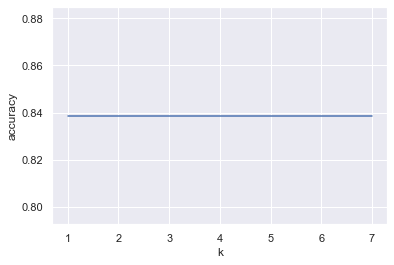

In [85]:
# step5 - Plot a graph showing how the accuracy on the validation set varies when changing K
acc_df = pd.DataFrame(zip(x_acc,y_acc), columns = ['k', 'accuracy'])
ax = sns.lineplot(x="k", y="accuracy", data=acc_df)

In [86]:
# step6 - How the boundaries change? Why?
# Changing the number of NN obviously means
# that we're changing the boundaries that separate our data.
# More specifically we see that using 1NN we're very sensbile to outliers
# enlarging the number of NN the classifier is more robust to outliers, but we risk to include
# points that are from other classes.

In [87]:
# step7 - Use the best value of K and evaluate the model on the test set.How well does it works?
best_k = acc_df.loc[acc_df['accuracy'] == acc_df['accuracy'].max(), 'k'].iloc[0]
neigh = KNeighborsClassifier(n_neighbors = best_k)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
test_acc= metrics.accuracy_score(y_test, y_pred)
test_acc

#How well does it works? The accuracy is almost 80%

0.7962962962962963

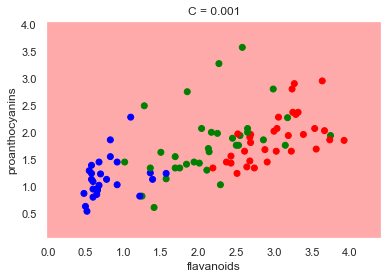

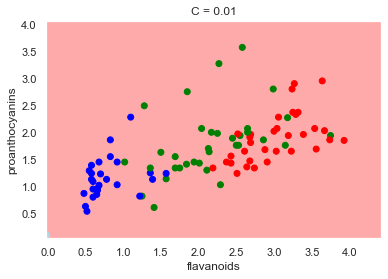

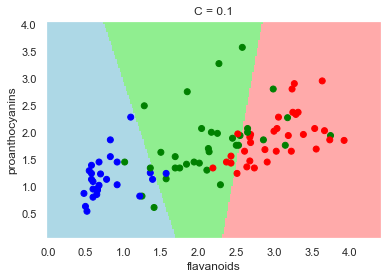

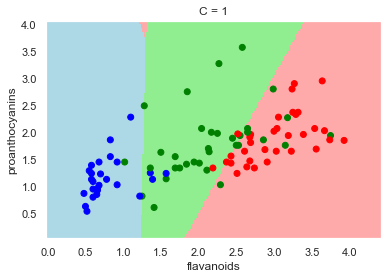

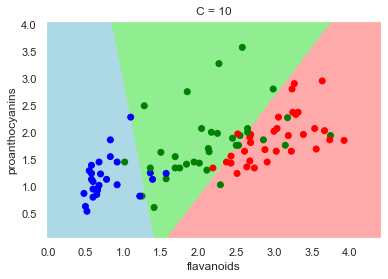

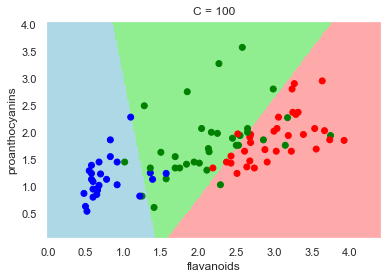

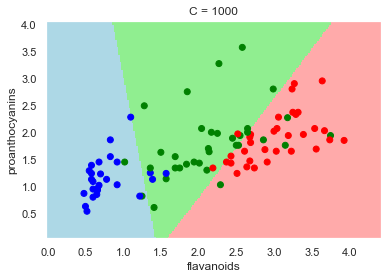

In [88]:
# step8

x_acc = []
y_acc = []

c_vect = [0.001, 0.01, 0.1, 1, 10, 100,1000]
for c_val in c_vect:
    clf = SVC(C = c_val, random_state=0, kernel = "linear")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    # plot the data and the decision boundaries
    title = 'C = ' + str(c_val)
    plotBoundaries(clf, X_train, y_train, title)
    
    local_acc = metrics.accuracy_score(y_val, y_pred)
    x_acc.append(c_val)
    y_acc.append(local_acc)

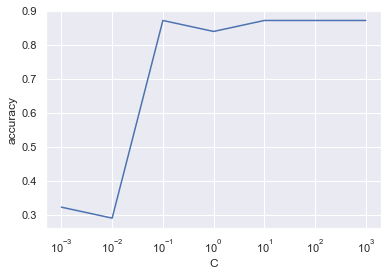

In [89]:
# step9 - Plot a graph showing how the accuracy on the validation set varies when changing C
acc_df = pd.DataFrame(zip(x_acc,y_acc), columns = ['C', 'accuracy'])
ax = sns.lineplot(x="C", y="accuracy", data=acc_df)
ax.set_xscale('log')

In [90]:
# TODO step10 - How the boundaries change? Why?

In [91]:
# step11 - Use the best value of C and evaluate the model on the test set
best_c = acc_df.loc[acc_df['accuracy'] == acc_df['accuracy'].max(), 'C'].iloc[0]
clf = SVC(C = best_c, random_state=0, kernel = "linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

local_acc= metrics.accuracy_score(y_test, y_pred)
local_acc


#How well does it works?

0.7777777777777778

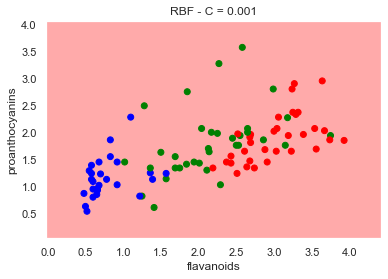

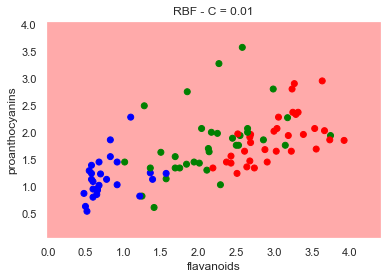

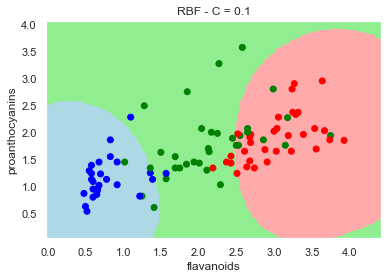

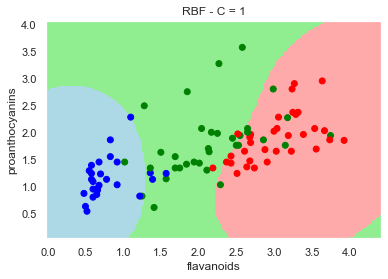

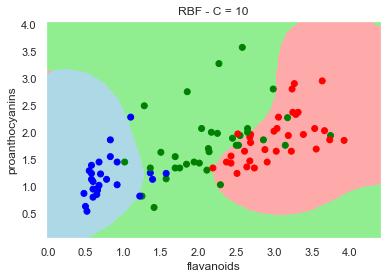

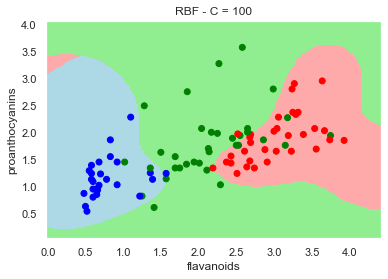

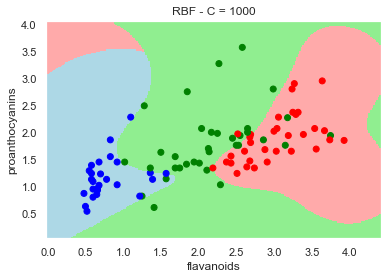

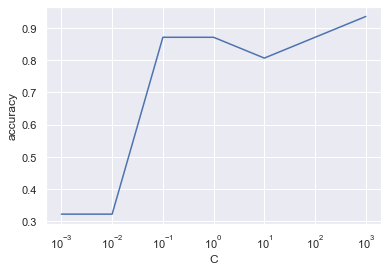

In [92]:
# may define a function here ...
# step12 - Repeat point 8. (train, plot, etc..), but this time use an RBF kernel
x_acc = []
y_acc = []

c_vect = [0.001, 0.01, 0.1, 1, 10, 100,1000]
for c_val in c_vect:
    clf = SVC(C = c_val, random_state=0, kernel = "rbf")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    title = 'RBF - C = ' + str(c_val)
    plotBoundaries(clf, X_train, y_train, title)
    
    local_acc= metrics.accuracy_score(y_val, y_pred)
    x_acc.append(c_val)
    y_acc.append(local_acc)
    
acc_df = pd.DataFrame(zip(x_acc,y_acc), columns = ['C', 'accuracy'])
ax = sns.lineplot(x="C", y="accuracy", data=acc_df)
ax.set_xscale('log')

In [93]:
# step13 - Evaluate the best C on the test set
best_c = acc_df.loc[acc_df['accuracy'] == acc_df['accuracy'].max(), 'C'].iloc[0]
clf = SVC(C = best_c, random_state=0, kernel = "rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

local_acc= metrics.accuracy_score(y_test, y_pred)
local_acc

0.7962962962962963

In [94]:
#TODO STEP14 - Are there any differences compared to the linear kernel? How are the boundaries different?
# The boundaries are curves instead of straight lines, this provides more flexible results.

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.9s finished


{'C': 10, 'gamma': 1}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.7962962962962963


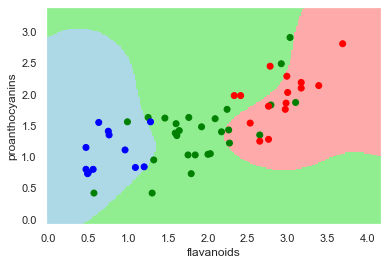

In [95]:
# step15
# Select the best parameters for classificator
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
classifier = SVC(kernel = 'rbf')
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
               'gamma': [10, 1, 0.01, 0.001, 0.0001]
             }  
  
grid = GridSearchCV(classifier, param_grid, refit = True, verbose = 1, scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

#Train the model and score it on the validation set. Evaluate the best parameters on the test set. 
classifier = SVC(**grid.best_params_)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

local_acc= metrics.accuracy_score(y_test, y_pred)
print(local_acc)

#Plot the decision boundaries. (first parameter and title of the graph are to be changed)
plotBoundaries(classifier, X_test, y_test, '')

In [96]:
# step16 - merge the training and validation split
merge = [X_train, X_val]
X_train_merged = pd.concat(merge)
y_train_merged = pd.concat([pd.Series(y_train), pd.Series(y_val)])

# step17 - Repeat the grid search for gamma and C but this time perform 5-fold validation 
classifier = SVC(kernel = 'rbf')

param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],  
               'gamma': [10, 1, 0.01, 0.001, 0.0001]
             }  
  
grid = GridSearchCV(classifier, param_grid, refit = True, verbose = 1, scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(X_train_merged, y_train_merged) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

#Train the model and score it on the validation set. Evaluate the best parameters on the test set. 
classifier = SVC(**grid.best_params_)
classifier.fit(X_train_merged, y_train_merged)

y_pred = classifier.predict(X_test)

val_acc = cross_val_score(classifier, X_train_merged, y_train_merged, cv=5, scoring='accuracy')
print(val_acc)

local_acc= metrics.accuracy_score(y_test, y_pred)
print(local_acc)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'gamma': 10}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[0.88  0.8   0.72  0.84  0.875]
0.8148148148148148


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    0.7s finished
